In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [12]:
df = pd.read_csv('daylio_export.csv')
df.head()`

,year,date,weekday,time,mood,activities,note
0,2018,June 22,Friday,20:39,bad,NaN,NaN
1,2018,June 21,Thursday,20:23,meh,NaN,NaN
2,2018,June 20,Wednesday,20:06,good,NaN,NaN
3,2018,June 19,Tuesday,20:00,good,work | Bike,NaN
4,2018,June 18,Monday,21:26,good,work | Sasha time | Bike,NaN


In [13]:
df['datetime'] = pd.to_datetime(df.time + ', ' + df.date + ', ' + df.year.map(str))

In [34]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M').dt.time

In [26]:
del df['year']

In [14]:
mood_order = ['rad', 'good', 'meh', 'bad', 'awful']
df.mood = df.mood.astype(CategoricalDtype(ordered=True, categories=mood_order))

In [18]:
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday',  'Thursday', 'Friday', 'Saturday']
df.weekday = df.weekday.astype(CategoricalDtype(ordered=True, categories=weekday_order))

In [19]:
df['mood_cat'] = df.mood.cat.codes
df['weekday_cat'] = df.weekday.cat.codes + 1

In [27]:
df.head()

,date,weekday,time,mood,activities,note,datetime,mood_cat,weekday_cat
0,June 22,Friday,20:39,bad,NaN,NaN,2018-06-22 20:39:00,3,6
1,June 21,Thursday,20:23,meh,NaN,NaN,2018-06-21 20:23:00,2,5
2,June 20,Wednesday,20:06,good,NaN,NaN,2018-06-20 20:06:00,1,4
3,June 19,Tuesday,20:00,good,work | Bike,NaN,2018-06-19 20:00:00,1,3
4,June 18,Monday,21:26,good,work | Sasha time | Bike,NaN,2018-06-18 21:26:00,1,2


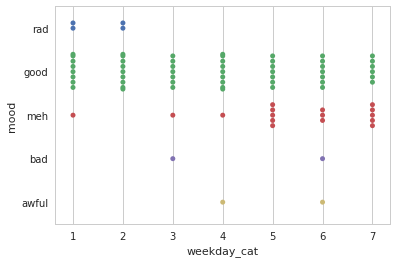

In [25]:
sns.swarmplot(x="weekday_cat", y="mood", data=df)

In [64]:
mood_dist = df.groupby('weekday')['mood_cat'].mean()
mood_dist

weekday
Sunday       0.909091
Monday       0.818182
Tuesday      1.333333
Wednesday    1.363636
Thursday     1.416667
Friday       1.666667
Saturday     1.454545
Name: mood_cat, dtype: float64

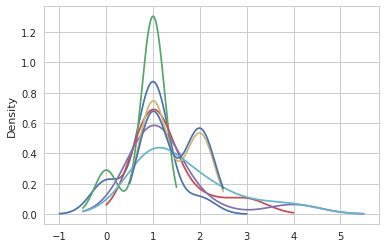

In [63]:
import matplotlib.pyplot as plt
bp = df.groupby('weekday')['mood_cat'].plot(kind='kde')